# **Healthcare No-Show Analysis: Enhanced EDA on Patient Appointment Data**

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset

In [2]:
base_data = pd.read_csv('/content/Data.csv')

# Display dataset shape and basic info
print(f"Dataset shape: {base_data.shape}")
base_data.info()
base_data.head()

Dataset shape: (110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#  Data Cleaning & Preprocessing

In [3]:
# Convert date columns to datetime format
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [4]:
# Extract weekday from ScheduledDay and AppointmentDay (0=Monday, 6=Sunday)
base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [5]:
# Rename columns for consistency and to correct typos
base_data = base_data.rename(columns={
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap',
    'SMS_received': 'SMSReceived',
    'No-show': 'NoShow'
})

In [6]:
# Drop columns not needed for analysis
base_data.drop(columns=['PatientId', 'AppointmentID', 'Neighbourhood'], inplace=True)

In [7]:
# Check for missing values
missing_percent = base_data.isnull().mean() * 100
print("\nMissing values percentage per column:")
print(missing_percent)


Missing values percentage per column:
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Scholarship       0.0
Hypertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handicap          0.0
SMSReceived       0.0
NoShow            0.0
sch_weekday       0.0
app_weekday       0.0
dtype: float64


In [8]:
# Display data info and summary
base_data.info()
base_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


# Target Variable Distribution

Text(0.5, 1.02, 'Count of TARGET Variable per category')

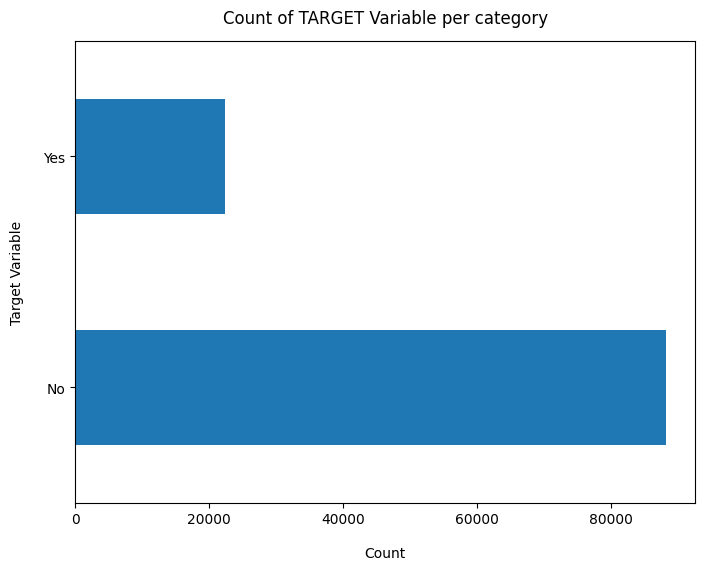

In [9]:
# Plot distribution of NoShow values
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [10]:
# Calculate percentage of NoShow classes
print(100 * base_data['NoShow'].value_counts() / len(base_data['NoShow']))

NoShow
No     79.806744
Yes    20.193256
Name: count, dtype: float64


# Missing Data Visualization

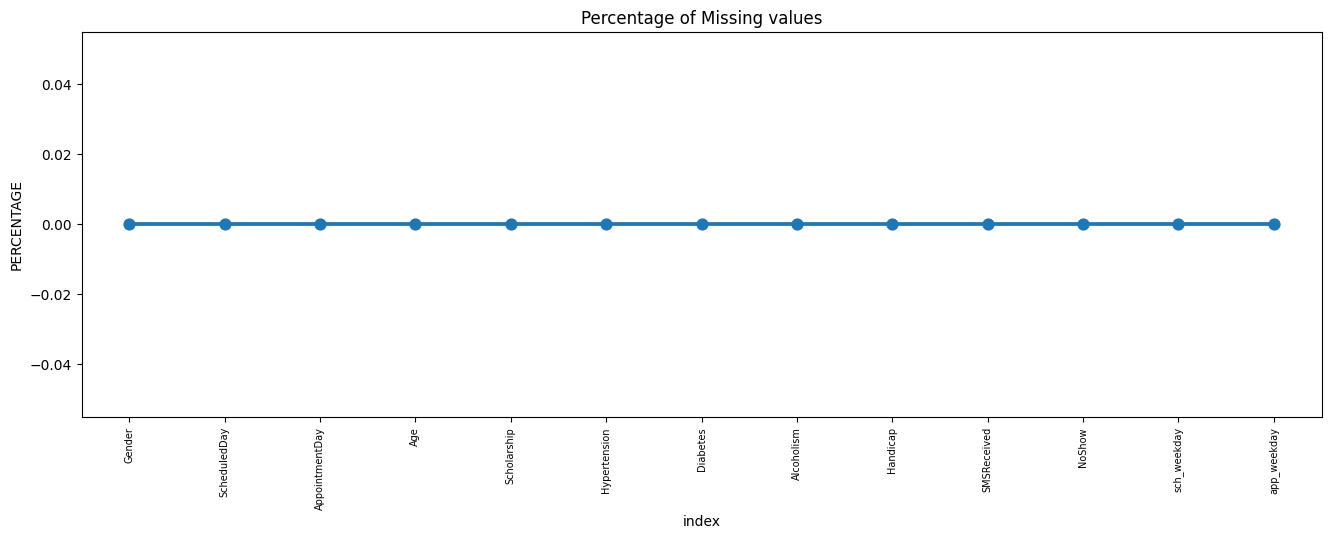

In [11]:
# Visualize missing data as percentages
missing = pd.DataFrame((base_data.isnull().sum()) * 100 / base_data.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# Feature Engineering

In [12]:
# Create age group bins for analysis
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]
base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [13]:
# Drop the original Age column
base_data.drop(['Age'], axis=1, inplace=True)

# Data Exploration

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-01-27       1
2016-01-19       1
2016-06-04       1
2016-01-26       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
---------- Scholarship ------

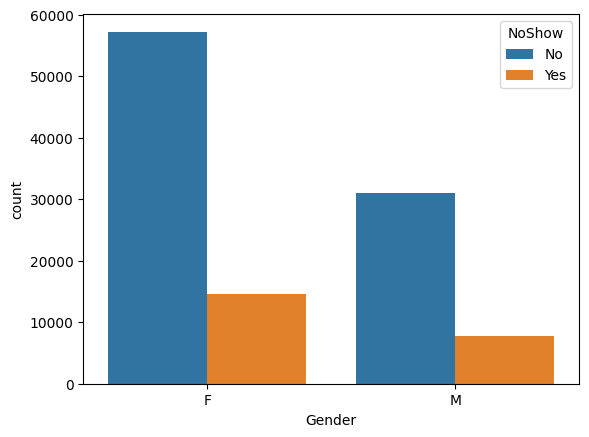

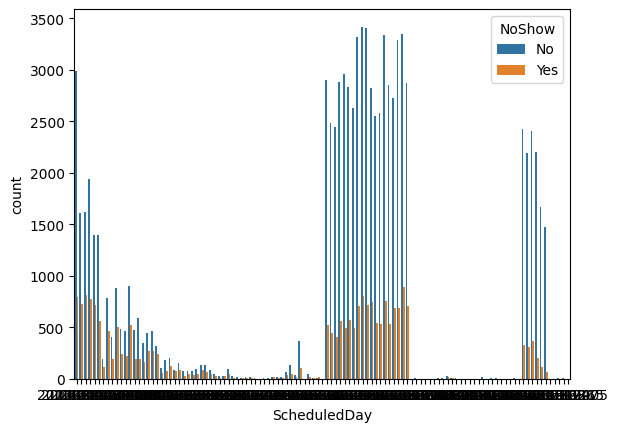

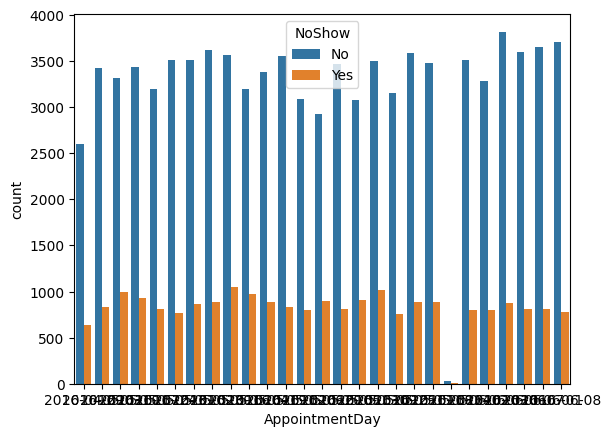

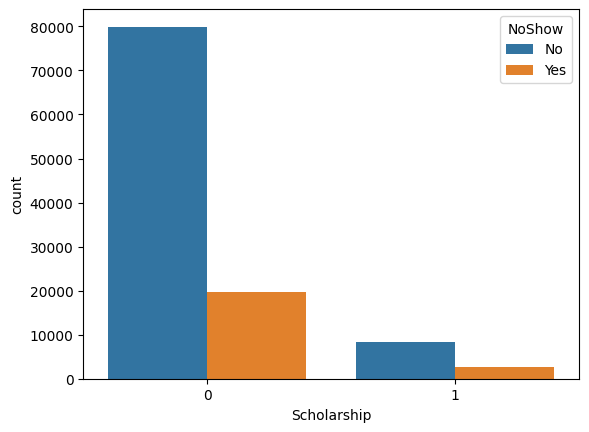

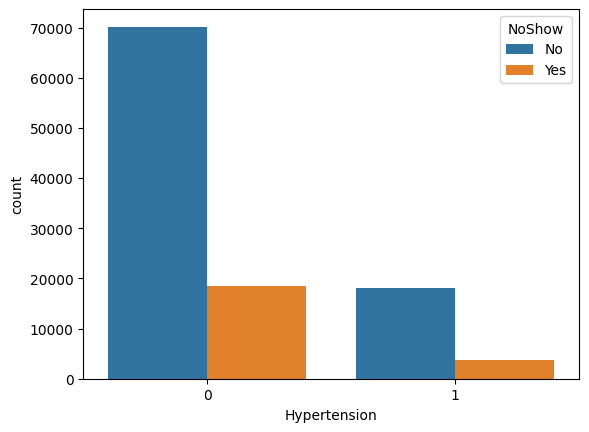

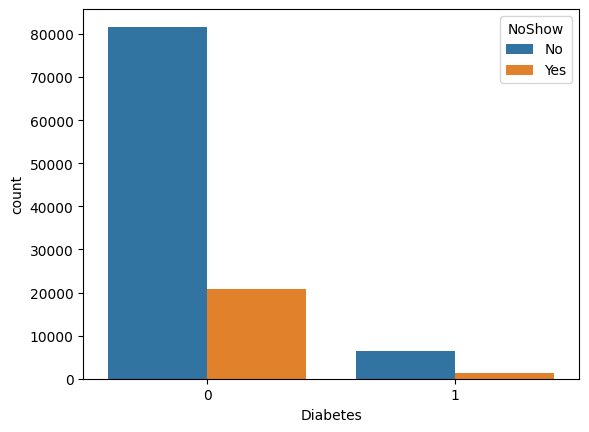

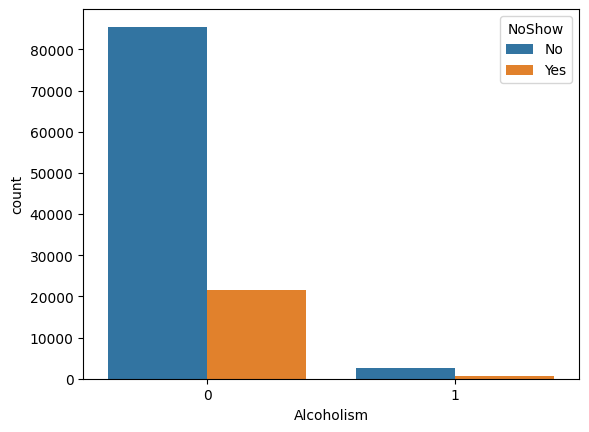

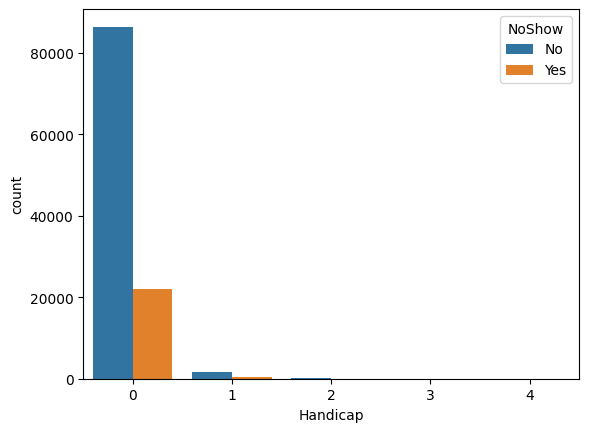

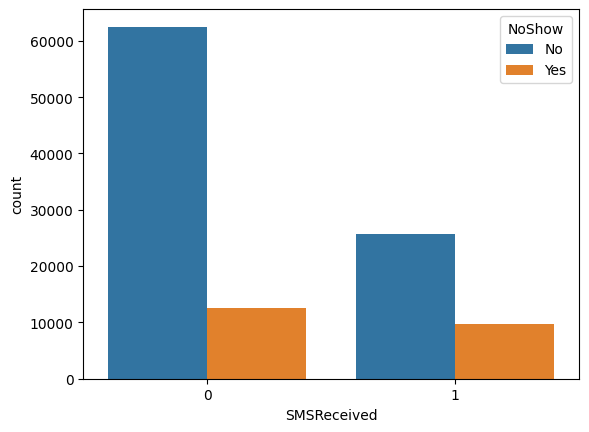

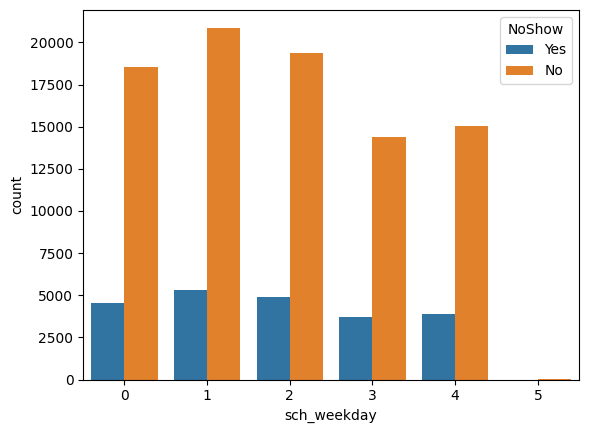

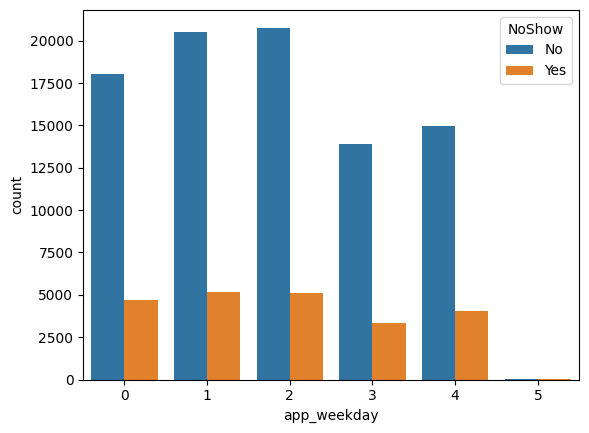

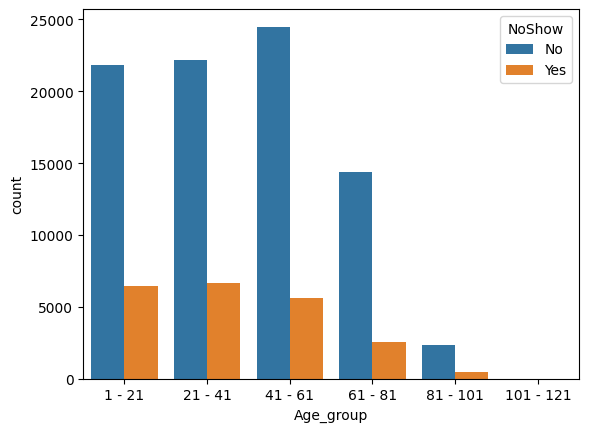

In [14]:
# Loop through all predictors to view counts by NoShow
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
    print('-' * 10, predictor, '-' * 10)
    print(base_data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='NoShow')

In [15]:
# Convert NoShow column to binary (1 for Yes, 0 for No)
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes', 1, 0)

# Correlation Analysis

In [16]:
# Convert categorical variables into dummy variables
base_data_dummies = pd.get_dummies(base_data)

Text(0.5, 1.0, 'Correlation of Features with NoShow')

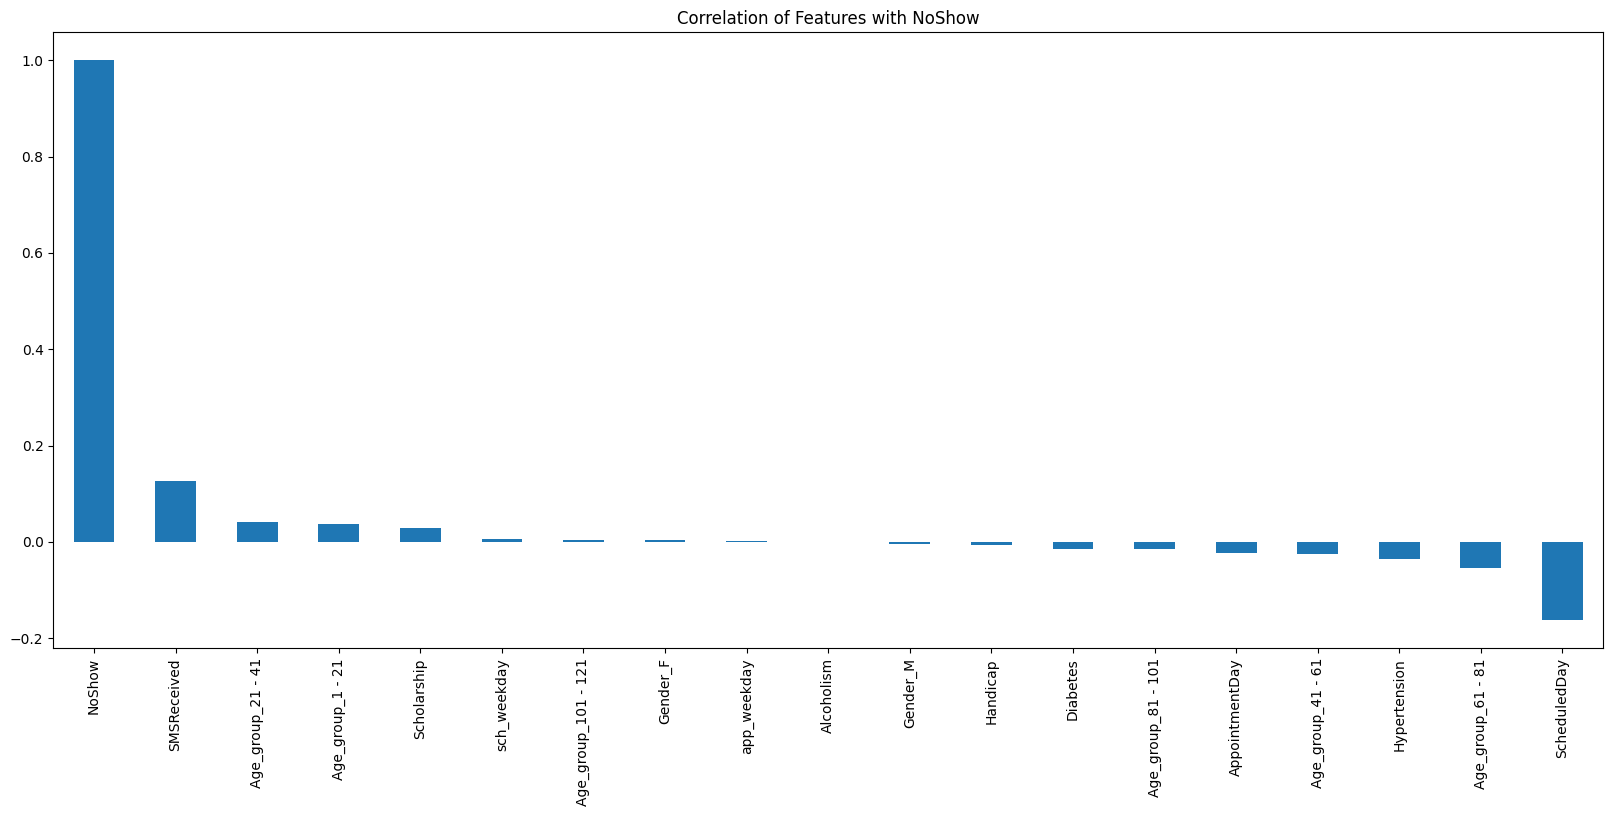

In [17]:
# Plot correlation of features with target variable
plt.figure(figsize=(20, 8))
base_data_dummies.corr()['NoShow'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with NoShow')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

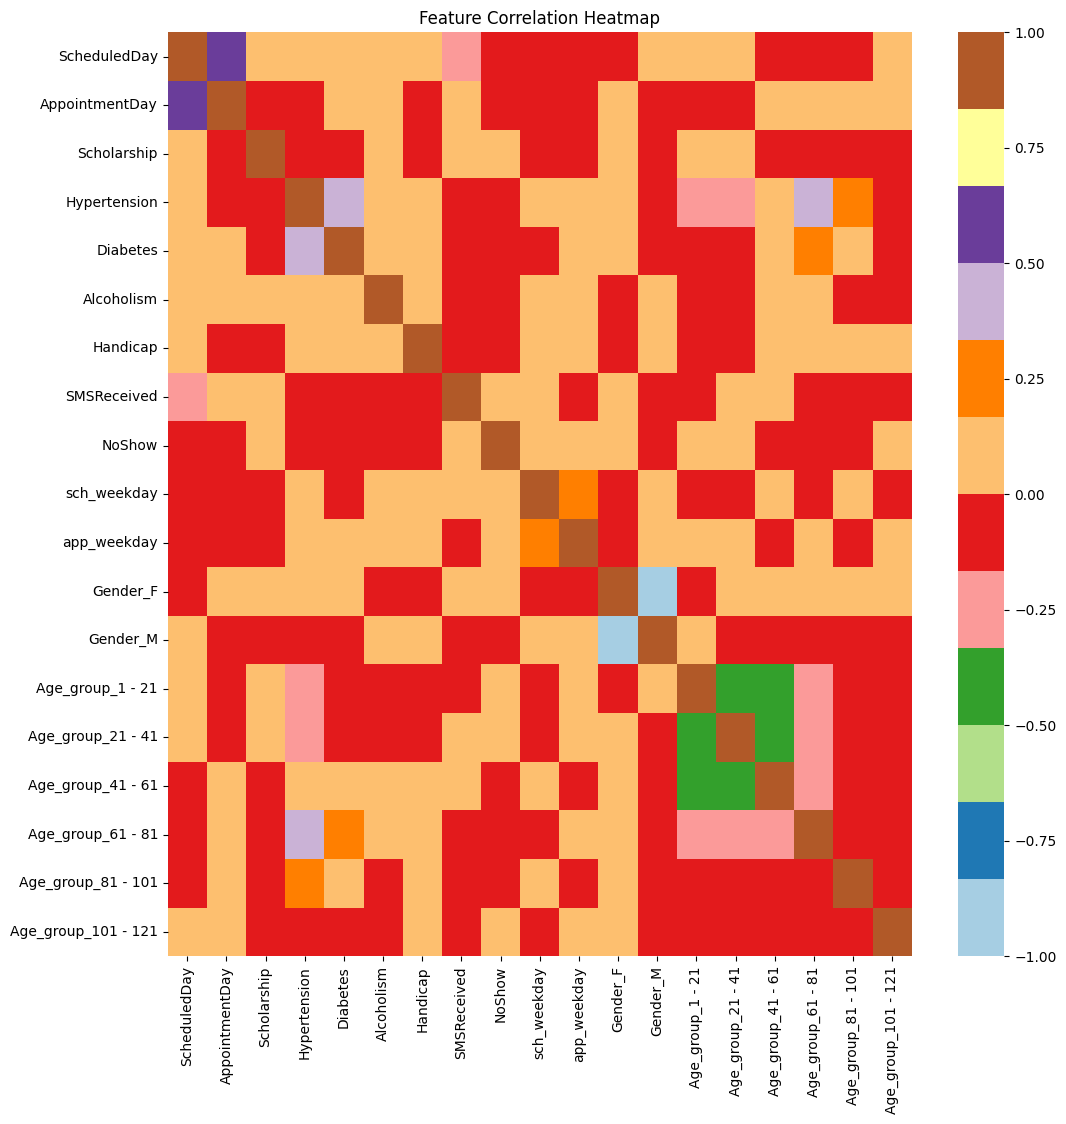

In [18]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")
plt.title('Feature Correlation Heatmap')

# Bivariate Analysis

In [19]:
# Separate data by target class
new_df1_target0 = base_data.loc[base_data["NoShow"] == 0]
new_df1_target1 = base_data.loc[base_data["NoShow"] == 1]

In [20]:
# Custom plot function for grouped countplots

def uniplot(df, col, title, hue=None):
    """
    Plots countplot with log-scaled y-axis for better readability of skewed data.
    """
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    plt.show()

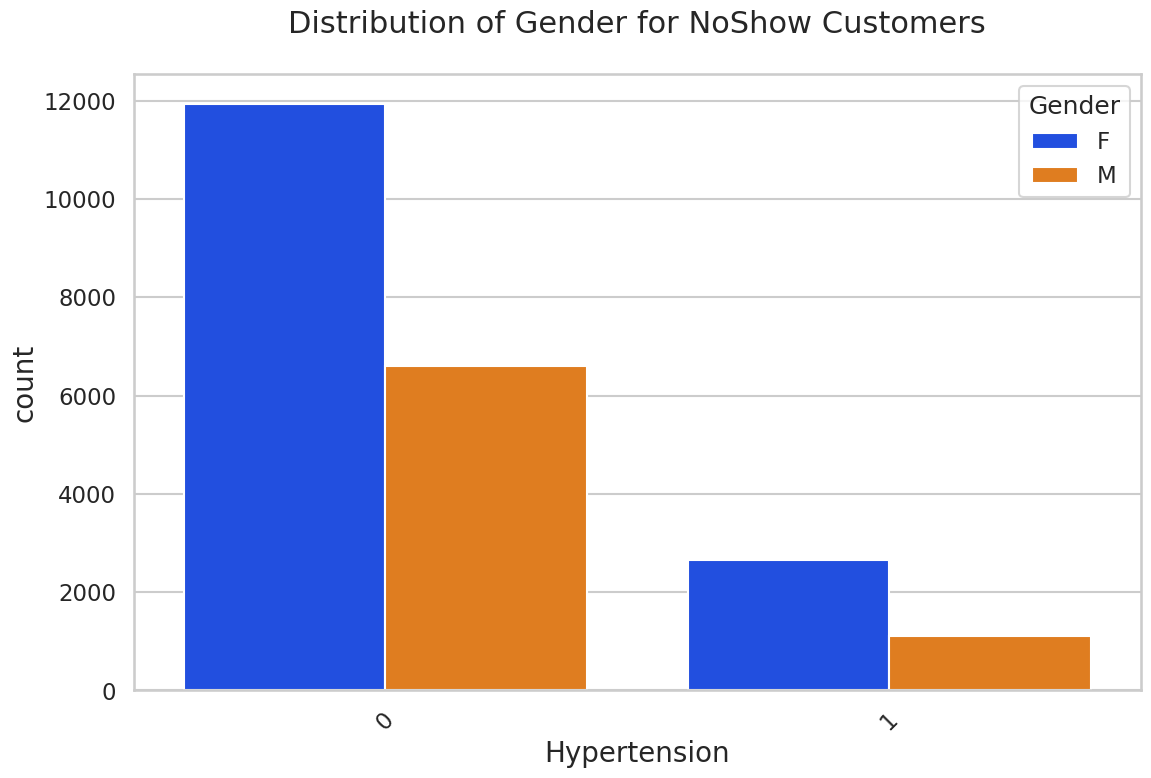

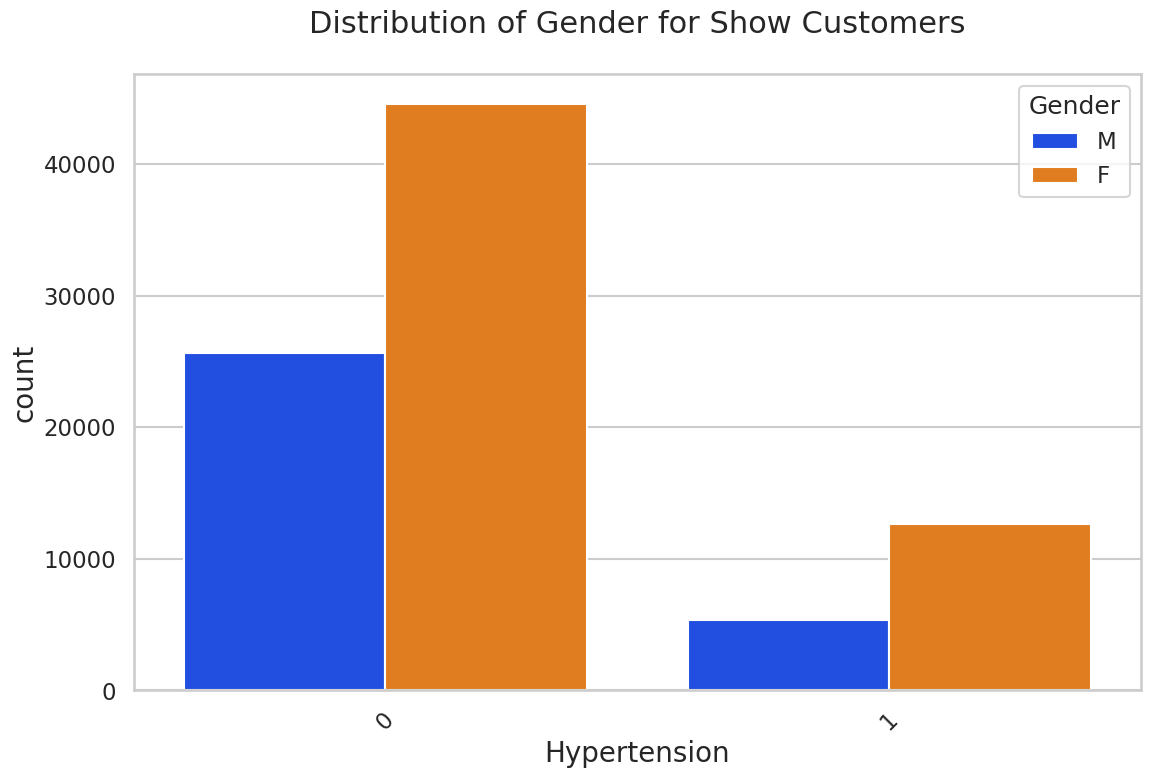

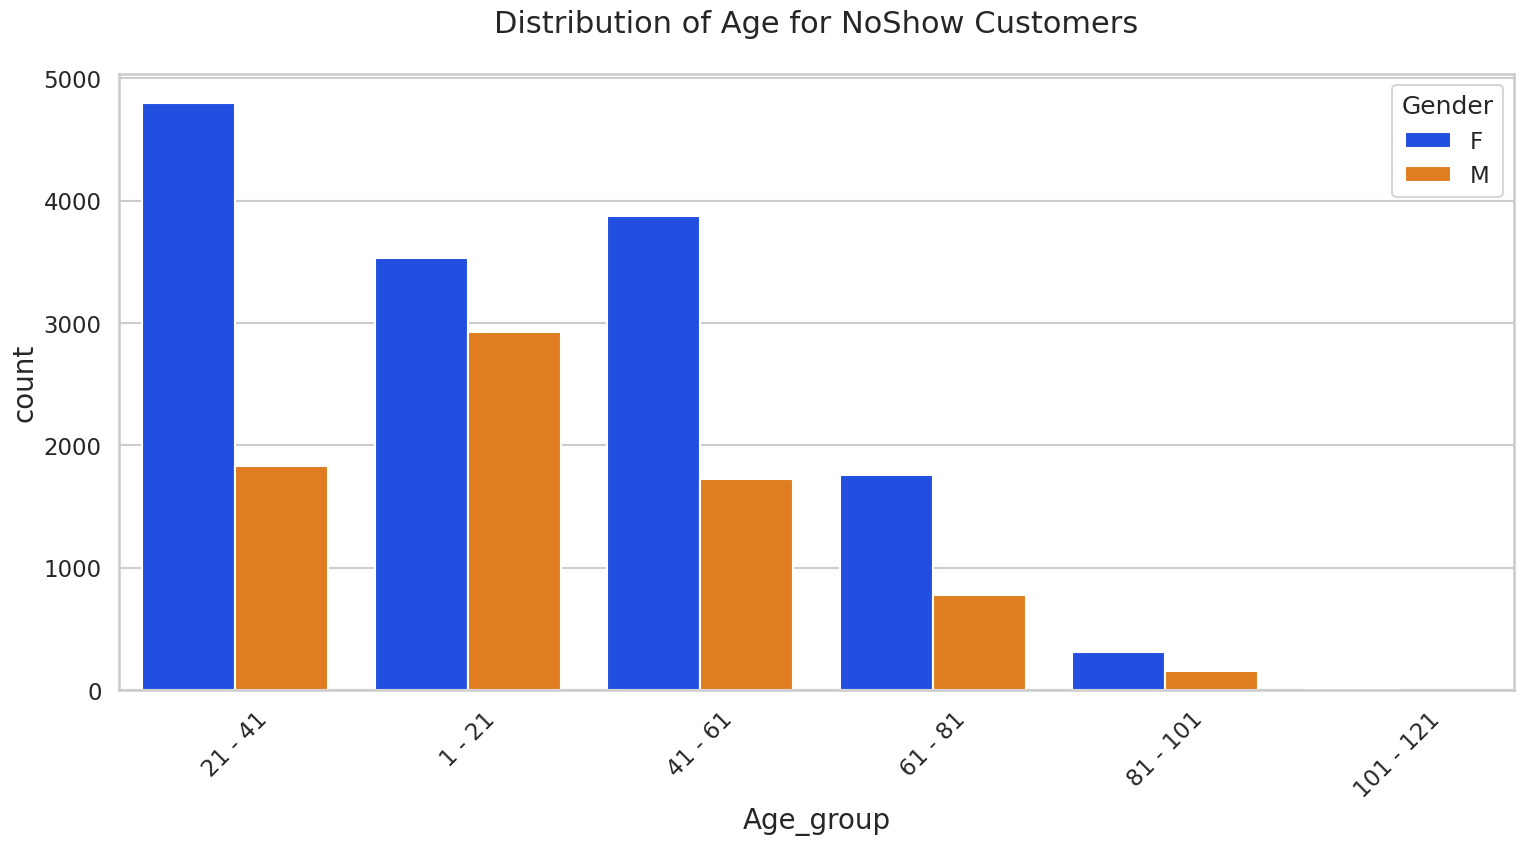

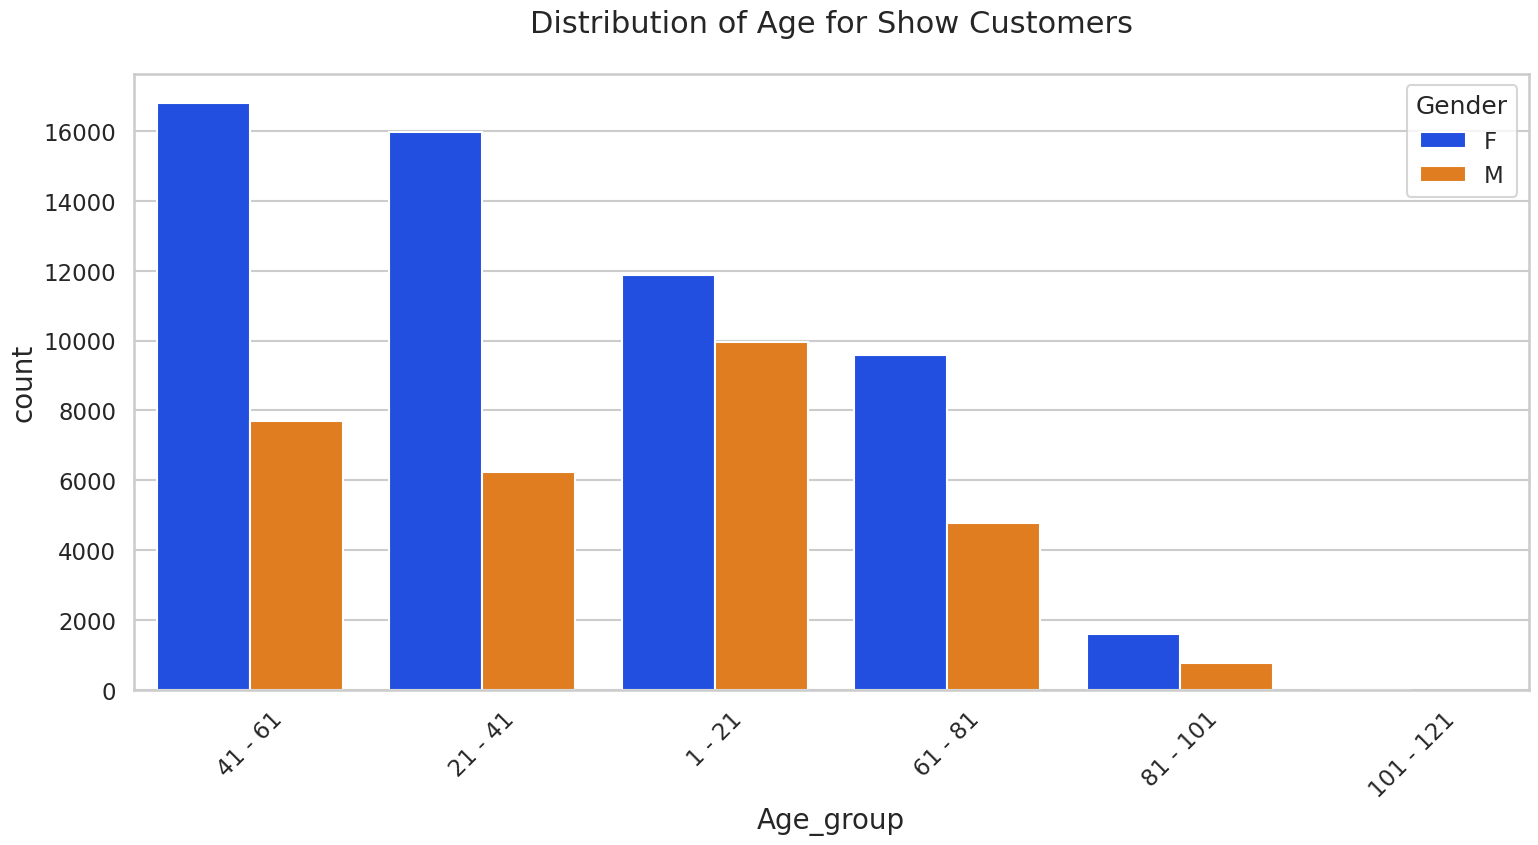

In [21]:
# Run bivariate plots
uniplot(new_df1_target1, col='Hypertension', title='Distribution of Gender for NoShow Customers', hue='Gender')
uniplot(new_df1_target0, col='Hypertension', title='Distribution of Gender for Show Customers', hue='Gender')
uniplot(new_df1_target1, col='Age_group', title='Distribution of Age for NoShow Customers', hue='Gender')
uniplot(new_df1_target0, col='Age_group', title='Distribution of Age for Show Customers', hue='Gender')

# Findings Summary

In [22]:
print("""
1. Female patients have taken more appointments than male patients
2. Ratio of NoShow and Show is almost equal for most age groups except Age 0 and Age 1 with ~80% show rate
3. Each Neighbourhood had about 80% show rate (data removed here)
4. Scholarship holders had slightly lower attendance (~75%) compared to non-holders (~80%)
5. Hypertensive patients showed higher attendance rates (~85%) compared to non-hypertensives (~78%)
6. Diabetic patients also showed higher attendance (~83%) vs non-diabetics (~80%)
7. Patients receiving SMS reminders had *lower* attendance (~72%) compared to those who didn't (~84%)
8. No appointments are scheduled on Sundays, and very few on Saturdays
""")



1. Female patients have taken more appointments than male patients
2. Ratio of NoShow and Show is almost equal for most age groups except Age 0 and Age 1 with ~80% show rate
3. Each Neighbourhood had about 80% show rate (data removed here)
4. Scholarship holders had slightly lower attendance (~75%) compared to non-holders (~80%)
5. Hypertensive patients showed higher attendance rates (~85%) compared to non-hypertensives (~78%)
6. Diabetic patients also showed higher attendance (~83%) vs non-diabetics (~80%)
7. Patients receiving SMS reminders had *lower* attendance (~72%) compared to those who didn't (~84%)
8. No appointments are scheduled on Sundays, and very few on Saturdays

